In [6]:
import os
from subprocess import Popen, PIPE
import numpy as np
import matplotlib.pyplot as plt

#Hugo code
import kex_data
import e7tools
import kex_headers

In [7]:
# input folder (emission and normalization)
phantom_folder = [r"C:/Users/petct/Desktop/CylinderPET-Converted", 
                  r"C:/Users/petct/Desktop/KanylPET-Converted"]
norm_file = []
number_of_gates = [2,2]
emission_file = []
emission_folder = []
output_emission_file = []
for k,folder in enumerate(phantom_folder):
    #print("phantom_folder", folder)
    phantom_str = folder.split('/')[-1].split('-')[0]
    print("phantom_str", phantom_str)
    norm_file.append(phantom_str + "-norm.n.hdr")
    #print("norm_file", norm_file)
    
    
    #get the sinogram folders
    #assumes that the sinogram folders (-99) are before listmode and all (LM-00 and WB-00)
    em_dir = []
    em_file = []
    oem_file = []
    gate_count = 0
    with os.scandir(folder) as it:
        for entry in it:
            if entry.name.startswith(phantom_str) and entry.is_dir():
                gate_count += 1
                
                em_dir.append(entry.name)
                
                with os.scandir(folder + r"/" + entry.name) as subit:
                        for sub_entry in subit:
                            if sub_entry.name.endswith("-sino.mhdr") and sub_entry.name.startswith(phantom_str):
                                #print(entry.name)
                                em_file.append(sub_entry.name)
                                oem_file.append(sub_entry.name.replace("sino", "sino-norm"))
                                break
                #leave when the gates have been processed
                if gate_count >= number_of_gates[k]:
                    break
       
    emission_folder.append(em_dir)
    emission_file.append(em_file)
    output_emission_file.append(oem_file)
    
print("norm_file", norm_file)
print("emission_folder", emission_folder)
print("emission_file", emission_file)
print("output_emission_file", output_emission_file)

phantom_str CylinderPET
phantom_str KanylPET
norm_file ['CylinderPET-norm.n.hdr', 'KanylPET-norm.n.hdr']
emission_folder [['CylinderPET-00', 'CylinderPET-01'], ['KanylPET-00', 'KanylPET-01']]
emission_file [['CylinderPET-00-sino.mhdr', 'CylinderPET-01-sino.mhdr'], ['KanylPET-00-sino.mhdr', 'KanylPET-01-sino.mhdr']]
output_emission_file [['CylinderPET-00-sino-norm.mhdr', 'CylinderPET-01-sino-norm.mhdr'], ['KanylPET-00-sino-norm.mhdr', 'KanylPET-01-sino-norm.mhdr']]


In [8]:
e7tools.run_tool("e7_recon.exe -h")

stdout
 b'
                                                   (c) 2003-2015 Siemens Healthcare MI

e7_recon - calculate an image from a 2d or 3d sinogram

Usage:

 e7_recon (-e emission[,r,t,dim] [-u u-map] [-n norm[,r,t]|--np norm] [-w width]
           --oi image [--ois signed short integer image] [--oe emission]
           [--os scatter] [--fl] [--nrarc] [--naarc] [--dc] [-k a,b,...,n]
           [-r fore[,alim,wlim,klim]|ssrb|seg0] [--is iterations,subsets]
           [--chunk (pos,index)[,(pos, index)]] [--algo algorithm] [--gf]
           [--nosc] [--rs] [--tof] [--fltr filterName[,order],fwhm_xy,fwhm_z]
           [--mash4] [--izoom factor] [--lres] [--xoffs offset] [--yoffs offset]
           [--psf default|a,b,c,d,e,f,g,h,i] [--gf] [--resrv ip,port,port]
           [--regmt d1,d2,...d16] [--bp p0,p1,p2,...] [--reglt x,y]
           [--offs x,y,z] [--bmp path] [--mat a|a-b|a,b,...,n]
           [--model model|a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a2

0

In [9]:
gate_count = 0
gate_offset = 0
error_count = 0
# destination folder
destination_directory = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normalised_sinograms"
#emission input output, normalization file, keep tof bin, overwrite data, save intermediates to dir, no logging



for p,pha_folder in enumerate(phantom_folder):
    for g in range(number_of_gates[p]):
        command_string = "e7_recon.exe " 
        command_string += " -e " + pha_folder + r"/" + emission_folder[p][g] + r"/" + emission_file[p][g]
        command_string += " --oe " + destination_directory + r"/" + output_emission_file[p][g]

        command_string += " -n " + pha_folder + r"/" + norm_file[p]
        command_string += " --gf"
        command_string += " --tof --force "
        d_str = destination_directory + r"/" + "intermediates" + r"/" + emission_folder[p][g]
        print("d_Str\n\n", d_str)
        command_string += " -d " + d_str
        command_string += " -l 72"
        
        print("Command to e7_folder\n", command_string)
        #command_string.replace(r"/", r"\\")
        #print("replaced " + r"/" + "\n", command_string)
        r = e7tools.run_tool(command_string)
        print("returncode", r)
        if r != 0:
            error_count +=1
        
        if error_count > 0:
            break
        gate_count +=1
    gate_offset += g
        
    if error_count > 0:
            break
        
print(gate_count, " gates normalized")
print(error_count, "errors ")

d_Str

 C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normalised_sinograms/intermediates/CylinderPET-00
Command to e7_folder
 e7_recon.exe  -e C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-00/CylinderPET-00-sino.mhdr --oe C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normalised_sinograms/CylinderPET-00-sino-norm.mhdr -n C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-norm.n.hdr --gf --tof --force  -d C:/Users/petct/Desktop/Hugo/Code/PythonMEX/normalised_sinograms/intermediates/CylinderPET-00 -l 72
stdout
 b''
stderr
 b"I 05/26/2020 15:21:37.567 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/26/2020 15:21:37.567 (UTC+01:00) Number of NUMA nodes: 1
I 05/26/2020 15:21:37.567 (UTC+01:00) Number of physical processor packages: 1
I 05/26/2020 15:21:37.567 (UTC+01:00) Number of processor cores: 4
I 05/26/2020 15:21:37.567 (UTC+01:00) Number of logical processors: 8
I 05/26/2020 15:21:37.567 (UTC+01:00) Number of processor L1/L2/L3 caches: 

stdout
 b''
stderr
 b"I 05/26/2020 15:21:53.943 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/26/2020 15:21:53.943 (UTC+01:00) Number of NUMA nodes: 1
I 05/26/2020 15:21:53.943 (UTC+01:00) Number of physical processor packages: 1
I 05/26/2020 15:21:53.943 (UTC+01:00) Number of processor cores: 4
I 05/26/2020 15:21:53.943 (UTC+01:00) Number of logical processors: 8
I 05/26/2020 15:21:53.943 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/26/2020 15:21:53.943 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/26/2020 15:21:53.943 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/26/2020 15:21:54.249 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/26/2020 15:21:54.251 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/26/2020 15:21:54.251 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/26/2020 15:21:54.251 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/26/2020 15:21:54.251 (UTC+01:0

stdout
 b''
stderr
 b"I 05/26/2020 15:22:09.360 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/26/2020 15:22:09.361 (UTC+01:00) Number of NUMA nodes: 1
I 05/26/2020 15:22:09.361 (UTC+01:00) Number of physical processor packages: 1
I 05/26/2020 15:22:09.361 (UTC+01:00) Number of processor cores: 4
I 05/26/2020 15:22:09.361 (UTC+01:00) Number of logical processors: 8
I 05/26/2020 15:22:09.361 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/26/2020 15:22:09.361 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/26/2020 15:22:09.361 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/26/2020 15:22:09.619 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/26/2020 15:22:09.620 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/26/2020 15:22:09.620 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/26/2020 15:22:09.620 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/26/2020 15:22:09.620 (UTC+01:0

stdout
 b''
stderr
 b"I 05/26/2020 15:22:25.628 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/26/2020 15:22:25.628 (UTC+01:00) Number of NUMA nodes: 1
I 05/26/2020 15:22:25.628 (UTC+01:00) Number of physical processor packages: 1
I 05/26/2020 15:22:25.629 (UTC+01:00) Number of processor cores: 4
I 05/26/2020 15:22:25.629 (UTC+01:00) Number of logical processors: 8
I 05/26/2020 15:22:25.629 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/26/2020 15:22:25.629 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/26/2020 15:22:25.629 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/26/2020 15:22:25.941 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/26/2020 15:22:25.942 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/26/2020 15:22:25.942 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/26/2020 15:22:25.942 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/26/2020 15:22:25.942 (UTC+01:0

In [11]:
#verify results
#gather data
sinograms = []
datatype = np.float32
for p in range(len(phantom_folder)):
    for s in range(number_of_gates[p]):
        with open(destination_directory + r"/" + output_emission_file[p][s].split(".mhdr")[0]+"_00.s", 'rb') as file:
            sinogram_1D = np.fromfile(file, dtype=datatype)
            
        print("ratio", np.size(sinogram_1D)/np.prod(kex_headers.HISTOGRAM_SHAPE))
        
            
        sinograms.append(np.reshape(sinogram_1D, newshape=(kex_headers.NUMBER_OF_TOFBINS, 
                                                          kex_headers.NUMBER_OF_SINOGRAMS,
                                                          kex_headers.NUMBER_OF_VIEWS,
                                                          kex_headers.NUMBER_OF_PROJECTIONS)))

ratio 0.9285714285714286
ratio 0.9285714285714286
ratio 0.9285714285714286
ratio 0.9285714285714286


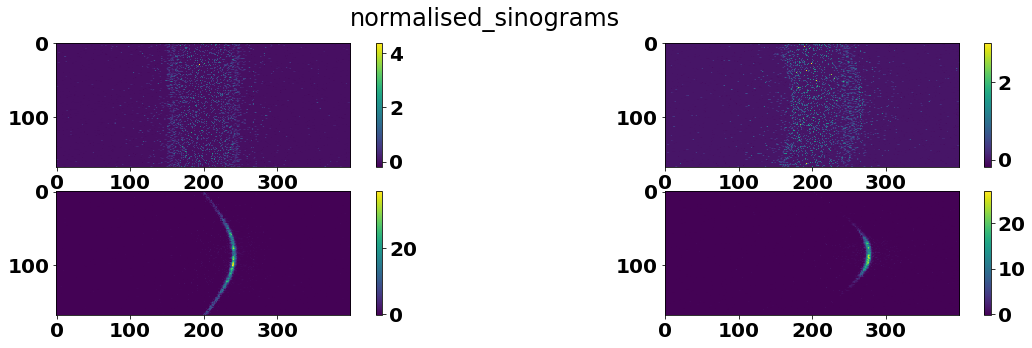

In [13]:
#plot sinograms
number_of_sinograms = len(sinograms)
scale = 5
plt.figure(figsize=(scale*number_of_sinograms, scale))
tof = 0
mi = 50
for k, sino in enumerate(sinograms):
    plt.subplot(2,number_of_sinograms/2, k+1)
    plt.imshow(sino[tof, mi])
    plt.colorbar()
    plt.suptitle("normalised_sinograms")
plt.show()

In [ ]:
def func(x, a=0,b=0,c=0):
    print(a+2*b+3*c)

In [ ]:
func(0,1,2,3)

In [ ]:
def g(x,**kwargs):
    func(x, **kwargs)

In [ ]:
g(0)

In [ ]:
g(0,)